In [116]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('./results/week2.csv')
df.head()

Unnamed: 0 Symbol Series        Date  Prev Close  Open Price  High Price  \
0           0    TCS     EQ  2017-05-15     2360.65      2375.1     2377.95   
1           1    TCS     EQ  2017-05-16     2365.10      2380.0     2435.00   
2           2    TCS     EQ  2017-05-17     2429.15      2433.5     2460.75   
3           3    TCS     EQ  2017-05-18     2455.35      2450.0     2572.00   
4           4    TCS     EQ  2017-05-19     2536.20      2536.2     2540.55   

   Low Price  Last Price  Close Price  ...  Total Traded Quantity  \
0    2341.60     2368.00      2365.10  ...                 908802   
1    2373.45     2425.10      2429.15  ...                1800513   
2    2423.00     2450.00      2455.35  ...                1438099   
3    2442.25     2525.00      2536.20  ...                2569297   
4    2486.00     2503.85      2507.15  ...                 893022   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  \
0  2.138043e+09          30047           712450                   78.39   
1  4.339703e+09          58476          1167534                   64.84   
2  3.513729e+09          86412          1031752                   71.74   
3  6.489478e+09         111566          1135613                   44.20   
4  2.238430e+09          63112           517461                   57.94   

   Month  Year           PxV  Day_Perc_Change                Trend  
0      5  2017  2.149408e+09         0.000000  Slight or No change  
1      5  2017  4.373716e+09         0.027081  Slight or No change  
2      5  2017  3.531036e+09         0.010786  Slight or No change  
3      5  2017  6.516251e+09         0.032928  Slight or No change  
4      5  2017  2.238940e+09        -0.011454  Slight or No change  

[5 rows x 21 columns]

In [118]:
df['Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 21 columns):
Unnamed: 0                494 non-null int64
Symbol                    494 non-null object
Series                    494 non-null object
Date                      494 non-null datetime64[ns]
Prev Close                494 non-null float64
Open Price                494 non-null float64
High Price                494 non-null float64
Low Price                 494 non-null float64
Last Price                494 non-null float64
Close Price               494 non-null float64
Average Price             494 non-null float64
Total Traded Quantity     494 non-null int64
Turnover                  494 non-null float64
No. of Trades             494 non-null int64
Deliverable Qty           494 non-null int64
% Dly Qt to Traded Qty    494 non-null float64
Month                     494 non-null int64
Year                      494 non-null int64
PxV                       494 non-null float64
Day_Perc_

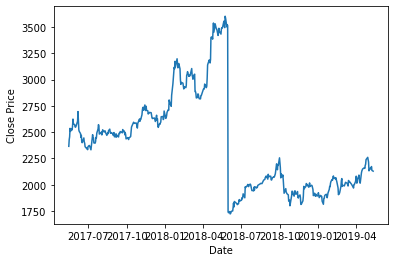

<Figure size 3600x1440 with 0 Axes>

In [119]:
plt.figure(1)
plt.plot(df['Date'],df['Close Price'])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.figure(figsize=(50,20))
plt.show()

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


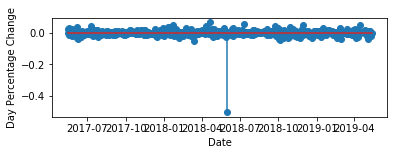

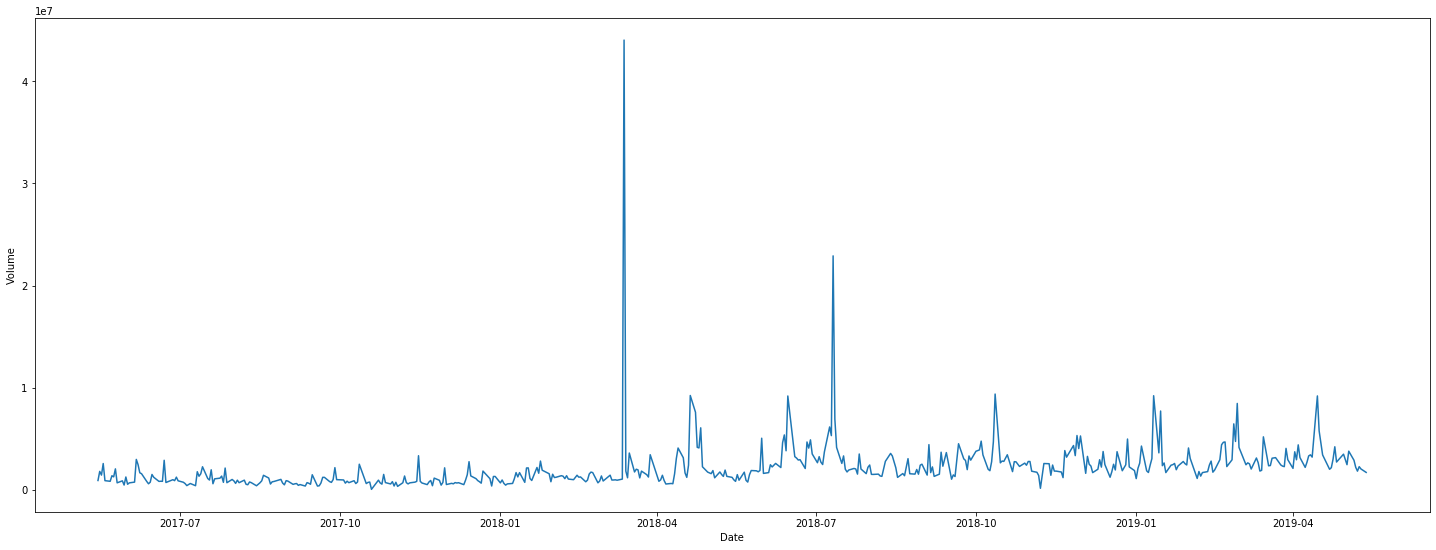

<Figure size 1440x1080 with 0 Axes>

In [120]:
plt.figure(1)
plt.subplot(211)
plt.stem(df['Date'],df['Day_Perc_Change'])
plt.xlabel("Date")
plt.ylabel("Day Percentage Change")
plt.figure(figsize=(25,20))

plt.subplot(212)
plt.plot(df['Date'],df['Total Traded Quantity'])
plt.xlabel("Date")
plt.ylabel("Volume")
plt.figure(figsize=(20,15))
plt.show()

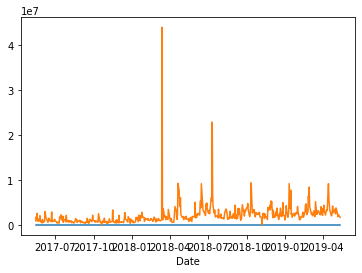

<Figure size 1440x1080 with 0 Axes>

In [121]:
plt.plot(df['Date'],df['Day_Perc_Change'],df['Date'],df['Total Traded Quantity'])
plt.xlabel("Date")
plt.figure(figsize=(20,15))
plt.show()

In [122]:
trend_groups = df.groupby(by='Trend')
trend_groups.first()

Unnamed: 0 Symbol Series       Date  Prev Close  \
Trend                                                                  
Slight negative             261    TCS     EQ 2018-05-31     3514.10   
Slight or No change           0    TCS     EQ 2017-05-15     2360.65   

                     Open Price  High Price  Low Price  Last Price  \
Trend                                                                
Slight negative          1734.0     1759.05     1726.1     1748.85   
Slight or No change      2375.1     2377.95     2341.6     2368.00   

                     Close Price  Average Price  Total Traded Quantity  \
Trend                                                                    
Slight negative          1741.05        1742.44                5049371   
Slight or No change      2365.10        2352.60                 908802   

                         Turnover  No. of Trades  Deliverable Qty  \
Trend                                                               
Slight negative      8.798250e+09         207998          3447026   
Slight or No change  2.138043e+09          30047           712450   

                     % Dly Qt to Traded Qty  Month  Year           PxV  \
Trend                                                                    
Slight negative                       68.27      5  2018  8.791207e+09   
Slight or No change                   78.39      5  2017  2.149408e+09   

                     Day_Perc_Change  
Trend                                 
Slight negative            -0.504553  
Slight or No change         0.000000

([<matplotlib.patches.Wedge at 0x22b34da25c8>,
 [Text(1.0999777562966169, 0.006995402251543332, 'Slight or No change'),
  Text(-1.0999777563273179, -0.0069953974240113655, 'Slight negative')],
 [Text(0.5999878670708818, 0.0038156739553872714, '0.2%'),
  Text(-0.5999878670876279, -0.0038156713221880172, '99.8%')])

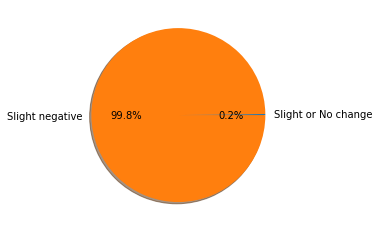

In [123]:
fig1, ax1 = plt.subplots()
labels = df['Trend'].unique()
ax1.pie(trend_groups['Date'].agg('count'),labels=labels, autopct='%1.1f%%', shadow=True)

<Figure size 432x288 with 0 Axes>

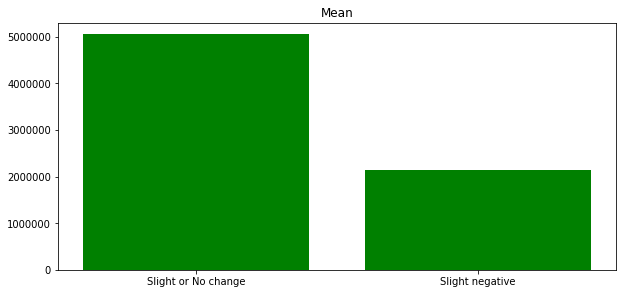

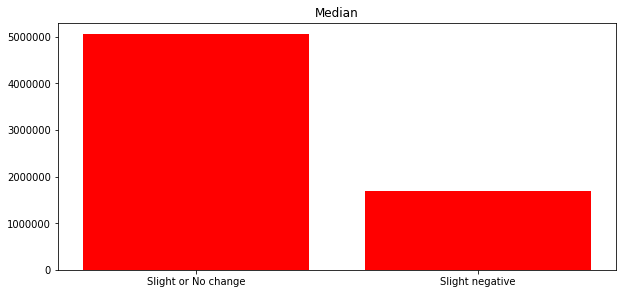

In [124]:
plt.figure(1)
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.bar(df['Trend'].unique(),trend_groups['Total Traded Quantity'].mean(), color='green')
plt.title("Mean")
plt.figure(figsize=(10,10))

plt.subplot(212)
plt.title("Median")
plt.bar(df['Trend'].unique(),trend_groups['Total Traded Quantity'].median(), color='red')
plt.show()

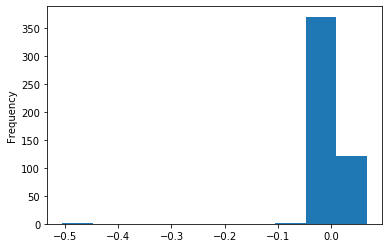

In [125]:
# plt.hist(df['Day_Perc_Change'])
# plt.show()
df['Day_Perc_Change'].plot.hist()

In [126]:
df_SP = pd.read_csv('./data/Large_Cap/SUNPHARMA.csv')
df_ITC = pd.read_csv('./data/Large_Cap/ITC.csv')
df_HDFC = pd.read_csv('./data/Large_Cap/HDFC.csv')
df_REL = pd.read_csv('./data/Large_Cap/RELIANCE.csv')
df_MM = pd.read_csv('./data/Large_Cap/M&M.csv')

In [127]:
df_MM.head()

Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0  M&amp;M     EQ  15-May-2017     1367.85      1373.0     1386.65     1370.0   
1  M&amp;M     EQ  16-May-2017     1375.65      1377.0     1380.50     1363.1   
2  M&amp;M     EQ  17-May-2017     1366.35      1363.0     1384.35     1360.4   
3  M&amp;M     EQ  18-May-2017     1378.80      1369.0     1372.00     1347.5   
4  M&amp;M     EQ  19-May-2017     1352.85      1350.0     1357.60     1328.5   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0     1374.80      1375.65        1378.31                 558190   
1     1364.15      1366.35        1371.22                 516012   
2     1379.00      1378.80        1378.56                 920884   
3     1347.50      1352.85        1361.70                1217846   
4     1338.20      1333.40        1344.80                 976742   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
0  7.693579e+08          38442           386664                   69.27  
1  7.075634e+08          29075           334469                   64.82  
2  1.269497e+09          32299           689649                   74.89  
3  1.658344e+09          20476          1043736                   85.70  
4  1.313522e+09          36297           773590                   79.20

In [128]:
df2 = [df_SP,df_ITC,df_HDFC,df_REL,df_MM]
for i in df2:
    print("Before:",len(i))
    i = i[i['Series'] == 'EQ']
    print(pd.isnull(i).any())
    print("After:",len(i))
    print()
    print()

Before: 495
Symbol                    False
Series                    False
Date                      False
Prev Close                False
Open Price                False
High Price                False
Low Price                 False
Last Price                False
Close Price               False
Average Price             False
Total Traded Quantity     False
Turnover                  False
No. of Trades             False
Deliverable Qty           False
% Dly Qt to Traded Qty    False
dtype: bool
After: 494


Before: 496
Symbol                    False
Series                    False
Date                      False
Prev Close                False
Open Price                False
High Price                False
Low Price                 False
Last Price                False
Close Price               False
Average Price             False
Total Traded Quantity     False
Turnover                  False
No. of Trades             False
Deliverable Qty           False
% Dly Qt to Traded Qty 

In [129]:
df_CP = pd.concat([df['Close Price'],df_HDFC['Close Price'],df_ITC['Close Price'],df_MM['Close Price'],df_REL['Close Price'],df_SP['Close Price']],axis = 1)
df_CP.columns = ['TCS','HDFC','ITC','MM','REL','SP']

In [130]:
df_CP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 6 columns):
TCS     494 non-null float64
HDFC    829 non-null float64
ITC     496 non-null float64
MM      497 non-null float64
REL     495 non-null float64
SP      495 non-null float64
dtypes: float64(6)
memory usage: 39.0 KB


In [131]:
df_CP.head()

TCS     HDFC     ITC       MM      REL      SP
0  2365.10  1559.50  277.95  1375.65  1344.10  654.45
1  2429.15   205.00  283.45  1366.35  1356.30  652.35
2  2455.35  1566.55  281.65  1378.80  1353.10  650.90
3  2536.20  1552.50  277.90  1352.85  1327.35  653.95
4  2507.15   207.00  286.20  1333.40  1318.85  653.15

In [132]:
df_CP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 6 columns):
TCS     494 non-null float64
HDFC    829 non-null float64
ITC     496 non-null float64
MM      497 non-null float64
REL     495 non-null float64
SP      495 non-null float64
dtypes: float64(6)
memory usage: 39.0 KB


In [133]:
df_CP = df_CP[:494]
df_CP.head()

TCS     HDFC     ITC       MM      REL      SP
0  2365.10  1559.50  277.95  1375.65  1344.10  654.45
1  2429.15   205.00  283.45  1366.35  1356.30  652.35
2  2455.35  1566.55  281.65  1378.80  1353.10  650.90
3  2536.20  1552.50  277.90  1352.85  1327.35  653.95
4  2507.15   207.00  286.20  1333.40  1318.85  653.15

In [134]:
df_cp_pct = df_CP.pct_change()[1:]

In [135]:
df_cp_pct.head()

TCS      HDFC       ITC        MM       REL        SP
1  0.027081 -0.868548  0.019788 -0.006760  0.009077 -0.003209
2  0.010786  6.641707 -0.006350  0.009112 -0.002359 -0.002223
3  0.032928 -0.008969 -0.013314 -0.018821 -0.019030  0.004686
4 -0.011454 -0.866667  0.029867 -0.014377 -0.006404 -0.001223
5  0.009652  6.425362  0.060797 -0.020361  0.004019 -0.019904

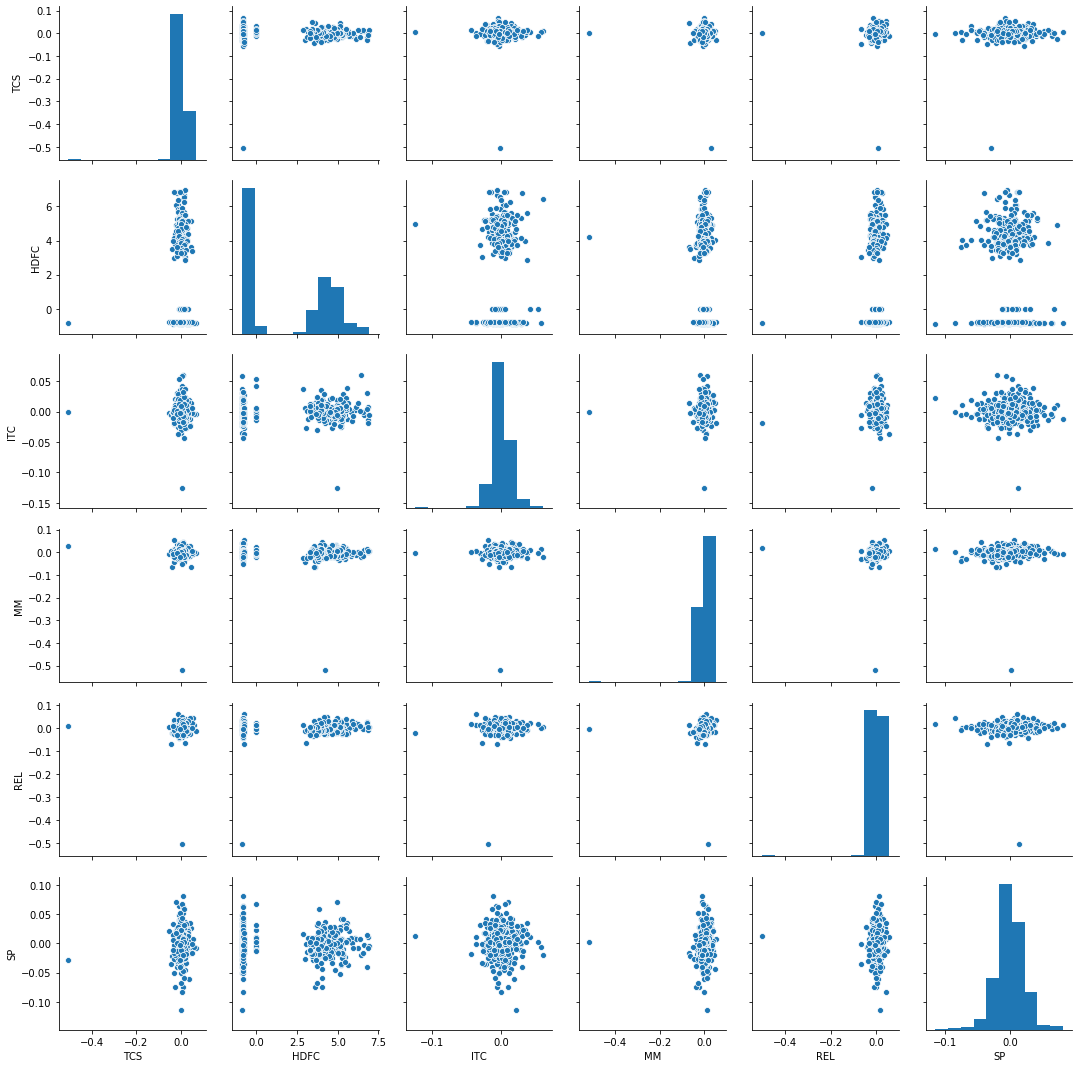

In [136]:
sns.pairplot(df_cp_pct)

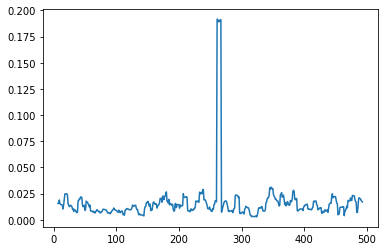

In [137]:
df_TCS_roll = df_cp_pct['TCS'].rolling(7).std()
plt.plot(df_TCS_roll)
plt.show()

In [138]:
df_nifty = pd.read_csv('./data/Nifty50/Nifty50.csv')
df_nifty.head()

Date     Open     High      Low    Close  Shares Traded  \
0  15-May-2017  9433.55  9449.25  9423.10  9445.40      145163953   
1  16-May-2017  9461.00  9517.20  9456.35  9512.25      171709433   
2  17-May-2017  9517.60  9532.60  9486.10  9525.75      211856040   
3  18-May-2017  9453.20  9489.10  9418.10  9429.45      199340647   
4  19-May-2017  9469.90  9505.75  9390.75  9427.90      259861396   

   Turnover (Rs. Cr)  
0            7790.97  
1            9209.89  
2           10726.23  
3           10782.46  
4           11544.77

In [139]:
df_nifty_pct = df_nifty['Close'].pct_change()
df_nifty_pct[0] = 0

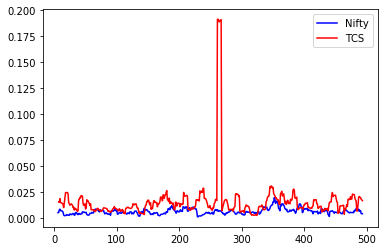

In [140]:
df_nifty_roll = df_nifty_pct.rolling(7).std()
plt.figure(2)

plt.plot(df_nifty_roll,label="Nifty",color='blue')
plt.plot(df_TCS_roll,label="TCS",color='red')
plt.legend()
plt.show()

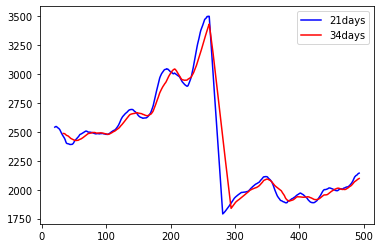

'SELL'

In [141]:
def mov_avg(d1,d2,df,day):
    df_roll = df.rolling(d1).mean()
    df_roll2 = df.rolling(d2).mean()
    plt.figure()
    plt.plot(df_roll,label = str(d1)+"days",color = 'blue')
    plt.plot(df_roll2,label = str(d2) +"days",color = 'red')
    plt.legend()
    plt.show()
    if(df_roll.iloc[day] >df_roll2.iloc[day] ):
        return 'BUY'
    else:
        return 'SELL'
mov_avg(21,34,df_CP['TCS'],100)



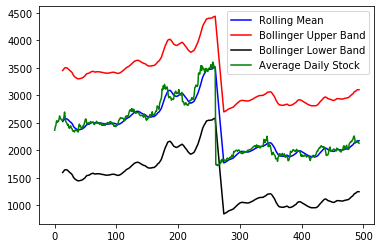

In [142]:
df_roll_m = df_CP['TCS'].rolling(14).mean() 
df_std = df_CP['TCS'].std()
df_upper_band = df_roll_m + 2*df_std
df_lower_band = df_roll_m - 2*df_std

plt.figure(3)

plt.plot(df_roll_m,label="Rolling Mean",color = 'blue')
plt.plot(df_upper_band,label = "Bollinger Upper Band",color = 'red')
plt.plot(df_lower_band,label = "Bollinger Lower Band",color = 'black')
plt.plot(df_CP['TCS'],label = "Average Daily Stock",color = 'green')
plt.legend()
plt.show()


In [143]:
df['Rolling_14']=df_roll_m
df['bollinger_upper']=df_upper_band
df['bollinger_lower']=df_lower_band

In [144]:
df = df.drop('Unnamed: 0',axis=1)

In [145]:
df.tail()

Symbol Series       Date  Prev Close  Open Price  High Price  Low Price  \
489    TCS     EQ 2019-05-07     2157.85     2160.05     2184.35    2138.80   
490    TCS     EQ 2019-05-08     2151.95     2151.00     2168.00    2130.40   
491    TCS     EQ 2019-05-09     2152.85     2145.00     2184.10    2136.10   
492    TCS     EQ 2019-05-10     2172.55     2175.00     2192.00    2125.85   
493    TCS     EQ 2019-05-13     2135.80     2133.00     2167.00    2121.65   

     Last Price  Close Price  Average Price  ...  Deliverable Qty  \
489     2154.00      2151.95        2163.53  ...           975603   
490     2156.00      2152.85        2151.85  ...           781526   
491     2171.20      2172.55        2166.98  ...          1251459   
492     2130.25      2135.80        2161.83  ...           873181   
493     2134.00      2128.75        2143.87  ...           677242   

     % Dly Qt to Traded Qty  Month  Year           PxV  Day_Perc_Change  \
489                   44.31      5  2019  4.737944e+09        -0.002734   
490                   42.83      5  2019  3.928725e+09         0.000418   
491                   55.27      5  2019  4.919005e+09         0.009151   
492                   42.81      5  2019  4.356248e+09        -0.016916   
493                   39.80      5  2019  3.622588e+09        -0.003301   

                   Trend   Rolling_14  bollinger_upper bollinger_lower  
489  Slight or No change  2161.478571      3088.898455     1234.058688  
490  Slight or No change  2171.360714      3098.780598     1243.940831  
491  Slight or No change  2175.592857      3103.012741     1248.172973  
492  Slight or No change  2175.878571      3103.298455     1248.458688  
493  Slight or No change  2174.357143      3101.777027     1246.937259  

[5 rows x 23 columns]

In [146]:
df.to_csv('./results/week3.csv')